In [55]:
import os, sys
sys.path.insert(1, '../')
import concentration as conc

import numpy as np
import scipy as sc
import pandas as pd

from importlib import reload
import utils

import matplotlib
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('native-010423-delta0.09.csv', index_col=0)
df

,q,n,width,covered,estimator,lower,upper
0,0.50,49,3.000000,1,prediction-powered,4.100000,7.100000
1,0.50,49,2.247277,0,classical,3.284341,5.531618
2,0.50,49,3.000000,1,prediction-powered,4.700000,7.700000
3,0.50,49,3.157921,1,classical,3.931617,7.089539
4,0.50,49,4.100000,1,prediction-powered,4.100000,8.200000
...,...,...,...,...,...,...,...
29995,0.75,1000,0.867352,1,classical,10.133627,11.000979
29996,0.75,1000,0.900000,1,prediction-powered,9.800000,10.700000
29997,0.75,1000,0.883278,1,classical,9.918705,10.801983
29998,0.75,1000,0.700000,1,prediction-powered,10.000000,10.700000


[  49   69   97  135  189  264  368  513  716 1000]


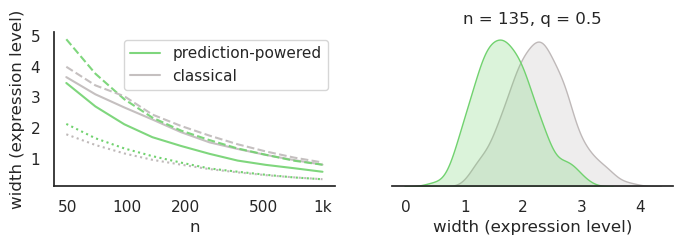

In [18]:
# plot comparison of confidence interval widths
save = True
n_to_plot = 135
c_cl, c_pp = "#BFB9B9", "#71D26F"
ns = np.logspace(np.log10(50), np.log10(1000), num=10, base=10).astype(int)
print(ns)
ns_xticks = [50, 100, 200, 500, 1000]
ns_xticklabels = [50, 100, 200, 500, '1k']
plot_df = df.loc[(df.q == 0.5) & (df.n == n_to_plot)]


fig, axs = plt.subplots(1, 2, figsize=(8, 2))

for q, ls in zip([0.25, 0.5, 0.75], [':', '-', '--']):
    dfqn = df.loc[df.q == q]
    wcl_n = np.array(
        [dfqn.loc[(dfqn.n == n) & (dfqn.estimator == 'classical')].width.mean()for n in ns])
    wpp_n = np.array(
        [dfqn.loc[(dfqn.n == n) & (dfqn.estimator == 'prediction-powered')].width.mean()for n in ns])
    axs[0].plot(
        ns, wpp_n,
        label='prediction-powered' if q == 0.5 else None,
        alpha=0.9 if q > 0.25 else 1, linestyle=ls, c=c_pp)
    axs[0].plot(
        ns, wcl_n,
        label='classical' if q == 0.5 else None,
        alpha=0.9 if q > 0.25 else 1, linestyle=ls, c=c_cl)
    
axs[0].set_xscale('log')
axs[0].set_xticks(ns_xticks)
axs[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[0].set_xticklabels(ns_xticklabels)
axs[0].set_xlabel('n');
axs[0].set_ylabel('width (expression level)')
axs[0].legend();
sns.despine(ax=axs[0],top=True,right=True)

my_palette = sns.color_palette([c_pp, c_cl], 2)
sns.set_theme(style="white", palette=my_palette)
kde = sns.kdeplot(
    plot_df, x="width", hue="estimator", hue_order=["prediction-powered", "classical"],
    fill=True, ax=axs[1])
kde.get_legend().remove()
sns.despine(ax=axs[1],top=True,right=True,left=True)
axs[1].set_xlabel("width (expression level)")
axs[1].set_ylabel('')
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_title('n = {}, q = 0.5'.format(n_to_plot));
if save:
    plt.savefig('figures/widths.png', dpi=300, bbox_inches='tight')
plt.show()

## plot one example set of intervals

In [24]:
native_df = pd.read_csv('Native_allchunks_test_tpu_model.csv', index_col=0)
native_df

,sequence,measured,predicted
index,,,
0,TGCATTTTTTTCACATCAAAAAAAAAAAAAAAAAAAAAAACTAGCA...,11.825806,11.353749
1,TGCATTTTTTTCACATCAAAAAAAAAAAAAAAATTTAAAGAATTTC...,11.412778,9.643128
2,TGCATTTTTTTCACATCAAAAAAAAGGACGTTCCACACTTGGCTGC...,10.623805,11.864820
3,TGCATTTTTTTCACATCAAAATCCGTGTAATACCAAGTCATCCTCA...,7.703389,8.650239
4,TGCATTTTTTTCACATCAGAAAAAAAGTATAATGTCAGATTTTTGT...,11.397473,13.881278
...,...,...,...
61145,TGCATTTTTTTCACATCAGAAAAAAAAAAAAAAAAAAAAAAAGAAA...,14.220082,12.520042
61146,TGCATTTTTTTCACATCAGAAAAAAAAAAAAGAGGAGACTTGAAGA...,6.978840,7.298204
61147,TGCATTTTTTTCACATCAGAAAAAAAAAAGGGATTGGGCGGTAATG...,3.917299,8.096985


In [53]:
q = 0.5
n = 97
tmp = df.loc[(df.q == q) & (df.n == n)]
cl_df = tmp[1::2]
pp_df = tmp[0::2]
idx = np.where(
    (cl_df.width.to_numpy() > pp_df.width.to_numpy() + 1)
    & (cl_df.covered.to_numpy() == 0)
    & (pp_df.covered.to_numpy() == 1)
)[0]
for i in idx:
    print(i)
    print(cl_df.iloc[i])
    print(pp_df.iloc[i])
    print()

24
q                  0.5
n                   97
width         2.670398
covered              0
estimator    classical
lower         5.682891
upper         8.353289
Name: 2049, dtype: object
q                           0.5
n                            97
width                       1.4
covered                       1
estimator    prediction-powered
lower                       4.8
upper                       6.2
Name: 2048, dtype: object

106
q                  0.5
n                   97
width         3.339863
covered              0
estimator    classical
lower         6.358137
upper            9.698
Name: 2213, dtype: object
q                           0.5
n                            97
width                       1.9
covered                       1
estimator    prediction-powered
lower                       4.8
upper                       6.7
Name: 2212, dtype: object

132
q                  0.5
n                   97
width         3.054164
covered              0
estimator    classica

In [56]:
# construct naive confidence interval
y_all = native_df.measured.to_numpy()
f_all = native_df.predicted.to_numpy()
f_all = 20 * (f_all - np.min(f_all)) / (np.max(f_all) - np.min(f_all))

ci_naive = utils.get_classical_ci(f_all, 0.5, 0.1)
print(ci_naive)

(5.249647069112655, 5.390791866900139)


5.650311615722635


/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6


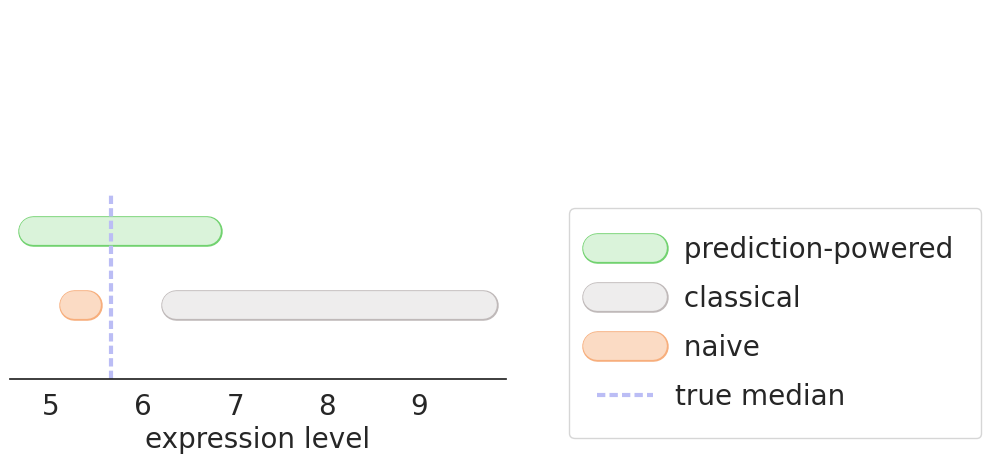

In [96]:
idx = 106
theta_star = np.quantile(native_df.measured, 0.5)
print(theta_star)
ci_pp = [pp_df.iloc[idx].lower, pp_df.iloc[idx].upper]
ci_cl = [cl_df.iloc[idx].lower, cl_df.iloc[idx].upper]

plt.figure(figsize=(6.4,4.8))
plt.plot(
    ci_pp,[0.4,0.4],
    linewidth=20, color="#DAF3DA",
    path_effects=[pe.Stroke(linewidth=22, foreground="#71D26F"), pe.Normal()],
    label=' prediction-powered'
)
plt.plot(
    ci_cl, [0.2, 0.2],
    linewidth=20, color="#EEEDED",
    path_effects=[pe.Stroke(linewidth=22, foreground="#BFB9B9"), pe.Normal()],
    label=' classical'
)
plt.plot(
    ci_naive, [0.2, 0.2],
    linewidth=20, color="#fbdbc4",
    path_effects=[pe.Stroke(linewidth=22, foreground="#F7AE7C"), pe.Normal()],
    label=' naive'
)
plt.plot(
    [theta_star, theta_star], [0, 0.5], linestyle='--', dashes=(2, 1), linewidth=3,
    label="true median", color="#bbbdf5"
)
plt.xlabel("expression level", fontsize=20)
plt.yticks([], labels=[])
plt.xticks([5, 6, 7, 8, 9], fontsize=20)
plt.ylim([0,1])
leg = plt.legend(fontsize=20, borderpad=1, labelspacing = 0.75, bbox_to_anchor=[1.1,0.5])
sns.despine(ax=plt.gca(),top=True,right=True,left=True)
# plt.gcf().subplots_adjust(right=0.85)

plt.savefig('./figures/intervals.pdf', ppi=300, bbox_inches='tight')
plt.show()